For Feature Matching we have three methods to do :
1. Brute force Feature matching using ORB Descriptors.
2. Brute Force matching with SIFT Descriptors and Ratio Test.
3. FLANN based matcher.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
first_cereal=cv2.imread('Data/reeses_puffs.png',0)

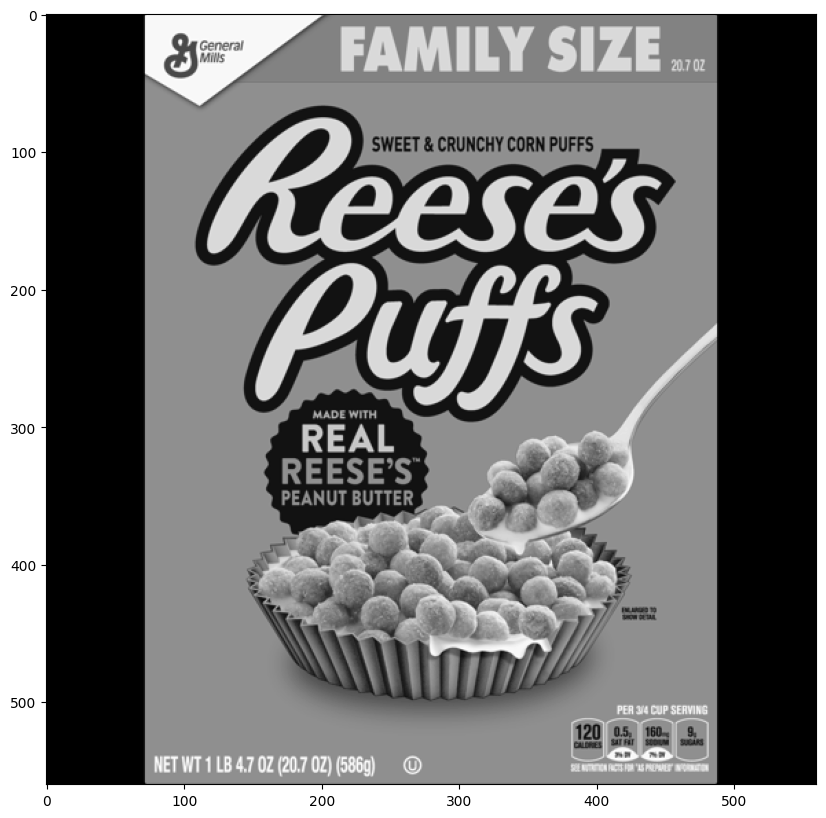

In [4]:
display_img(first_cereal)

In [5]:
many = cv2.imread('Data/many_cereals.jpg',0)

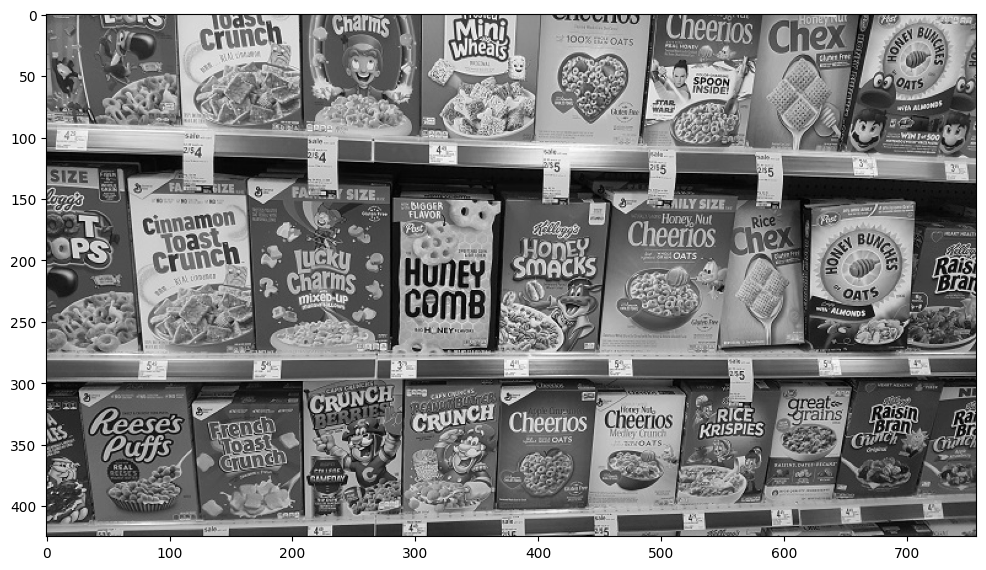

In [6]:
display_img(many)

In [7]:
#Brute force Feature matching using ORB Descriptors.

In [8]:
ORB = cv2.ORB_create()

In [9]:
kp1,des1=ORB.detectAndCompute(first_cereal,None)

In [10]:
kp2,des2=ORB.detectAndCompute(many,None)

In [11]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [12]:
matches = bf.match(des1,des2)

In [13]:
matches = sorted(matches,key=lambda x:x.distance)

In [14]:
resmatches=cv2.drawMatches(first_cereal,kp1,many,kp2,matches[:25],None,flags=2)

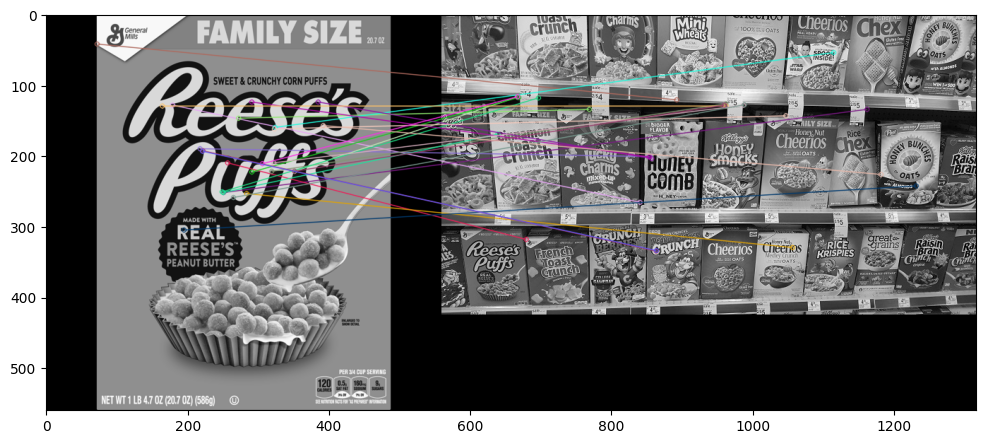

In [15]:
display_img(resmatches)

In [16]:
# as we can see that brute force using these descriptors is not efficent and results are not promising

In [17]:
#Brute Force matching with SIFT Descriptors and Ratio Test.

In [18]:
sift = cv2.xfeatures2d.SIFT_create()

[ WARN:0@1.054] global shadow_sift.hpp:13 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


In [19]:
kp1,des1=sift.detectAndCompute(first_cereal,None)
kp2,des2=sift.detectAndCompute(many,None)

In [20]:
bf=cv2.BFMatcher()

In [21]:
matches = bf.knnMatch(des1,des2,k=2)

In [22]:
good =[]

for match1,match2 in matches:
    if match1.distance < 0.65*match2.distance:
        good.append([match1])

In [23]:
resmatches=cv2.drawMatchesKnn(first_cereal,kp1,many,kp2,good,None,flags=2)

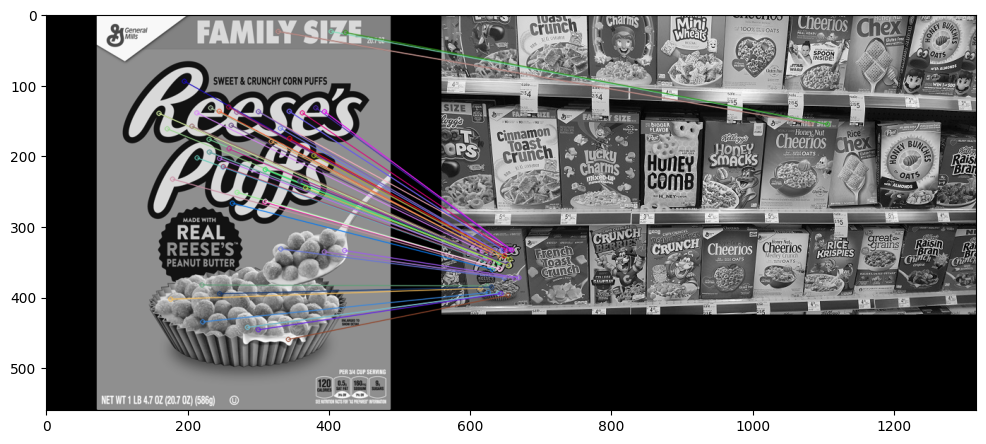

In [24]:
display_img(resmatches)

In [25]:
#FLANN based matcher

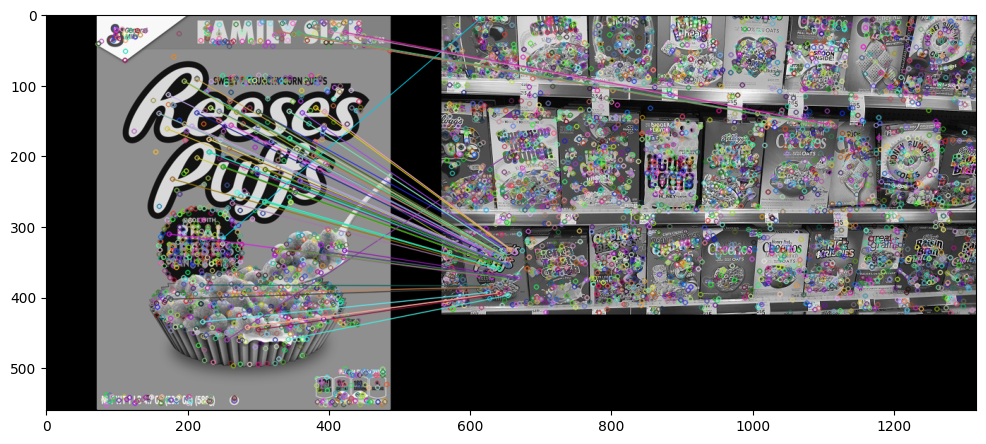

In [30]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(first_cereal,None)
kp2, des2 = sift.detectAndCompute(many,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=5000)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(first_cereal,kp1,many,kp2,good,None,flags=0)

display_img(flann_matches)